In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

arquivo = 'imd_notas.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)



['Notas']


In [12]:
#1)
#A
for i in range(6):
    print("Disciplina ID ", i, " = ", dados['disciplina_ID'].value_counts()[i]/dados.drop_duplicates(subset=['disciplina_ID', 'a_ID'])["disciplina_ID"].value_counts()[i])
    
#B
print("\n\nGeral = ", dados['disciplina_ID'].value_counts().sum()/dados.drop_duplicates(subset=['disciplina_ID', 'a_ID'])["disciplina_ID"].value_counts().sum())


Disciplina ID  0  =  1.3987473904
Disciplina ID  1  =  1.04441453567
Disciplina ID  2  =  1.20353982301
Disciplina ID  3  =  1.48219178082
Disciplina ID  4  =  1.07154213037
Disciplina ID  5  =  1.49713193117


Geral =  1.2472952086553324


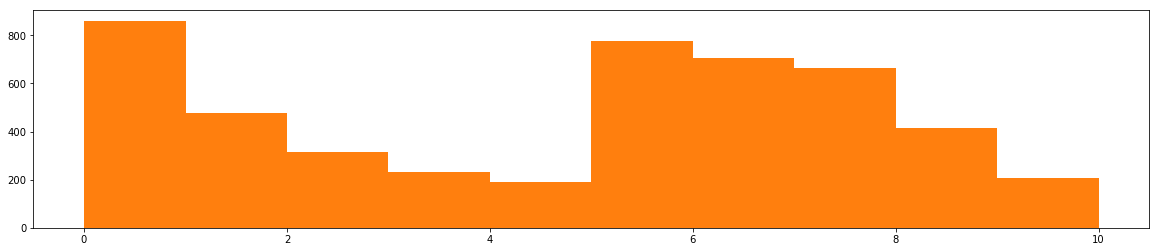

CEP       status.disciplina  status.disciplina
0         Aprovado           Aprovado             162
          Reprovado          Reprovado            127
1507000   Aprovado           Aprovado               6
5021000   Aprovado           Aprovado               4
          Reprovado          Reprovado              2
5163000   Aprovado           Aprovado               7
6321200   Aprovado           Aprovado               7
          Reprovado          Reprovado              2
12710520  Aprovado           Aprovado               4
          Reprovado          Reprovado              5
12723000  Aprovado           Aprovado               4
          Reprovado          Reprovado              4
18150000  Aprovado           Aprovado               7
18682430  Aprovado           Aprovado               3
          Reprovado          Reprovado              4
22725150  Aprovado           Aprovado               3
          Reprovado          Reprovado              1
35700416  Aprovado           Aprova

In [15]:
#2

fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(dados['bCEP'], range=(0,10))
ax1.hist(dados['nota'], range=(0,10))

plt.show()

print(dados.groupby(['CEP', 'status.disciplina'])['status.disciplina'].value_counts())


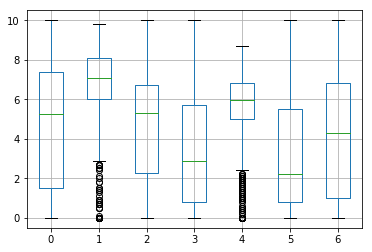

In [18]:
#3

norm_reviews = pd.DataFrame()
df = pd.DataFrame({'0':dados.loc[dados['disciplina_ID'] == 0]['nota'], 
                   '1':dados.loc[dados['disciplina_ID'] == 1]['nota'], 
                   '2':dados.loc[dados['disciplina_ID'] == 2]['nota'], 
                   '3':dados.loc[dados['disciplina_ID'] == 3]['nota'], 
                   '4':dados.loc[dados['disciplina_ID'] == 4]['nota'], 
                   '5':dados.loc[dados['disciplina_ID'] == 5]['nota'], 
                   '6':dados.loc[dados['disciplina_ID'] == 6]['nota']})

df.boxplot()

#fig3 = plt.figure(figsize=(20,4))


#plt.boxplot([0,1,2,3,4,5,6], labels=[0,1,2,3,4,5,6])
plt.show()



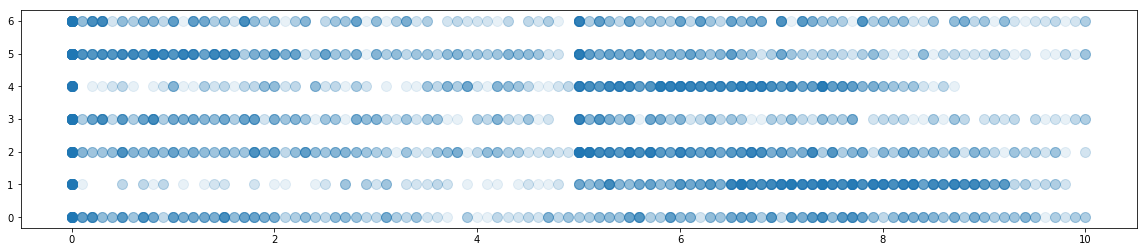

In [28]:
#4
fig2 = plt.figure(figsize=(20,4))

X = dados['nota']
Y = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)
plt.show()



In [30]:
#5

fig5 = plt.figure(figsize=(20,4))

dados["num_d"] = dados.loc[dados['ano_disciplina'] == 2015]['nota']

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

#df = pd.DataFrame({'0':dados.loc[dados['disciplina_ID'] == 0]['nota'], })
#dados2 = dados.loc[dados['disciplina_ID'] == 0]['nota']


#X = dados['nota']
#Y = [0,1,2,3,4,5,6,7]
#plt.scatter(X,Y, alpha=0.1, s=100)
#plt.show()



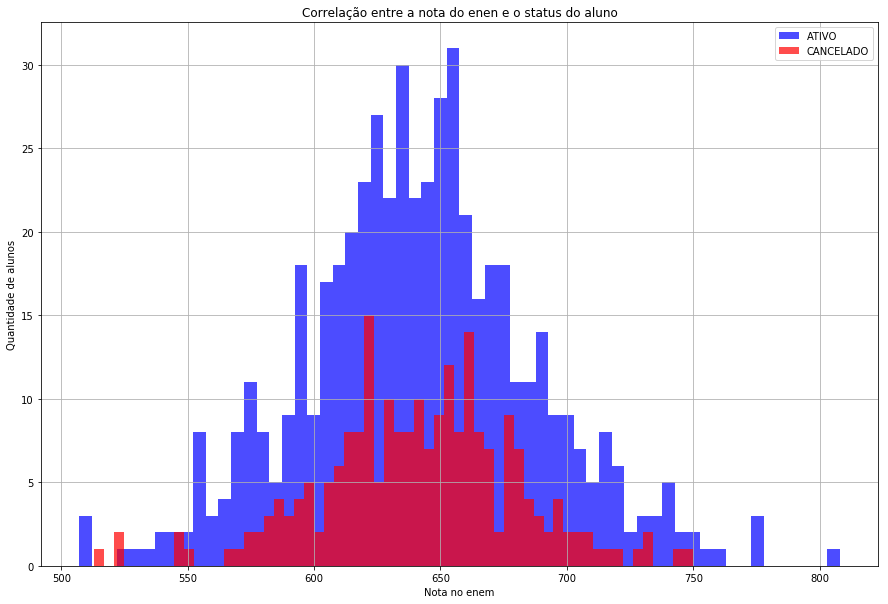

In [63]:
#6

fig6 = plt.figure(figsize=(15,10))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

ativo = dados.loc[dados['status'] == "ATIVO"].drop_duplicates(subset='a_ID')
cancelado = dados.loc[dados['status'] == "CANCELADO"].drop_duplicates(subset='a_ID')

ativo["enen-nota"].hist(color="blue", label="ATIVO", bins=60, alpha=0.7)
cancelado["enen-nota"].hist(color="red", label="CANCELADO", bins=60, alpha=0.7)

plt.legend()
plt.xlabel('Nota no enem')
plt.ylabel('Quantidade de alunos')
plt.title("Correlação entre a nota do enen e o status do aluno")
plt.show()



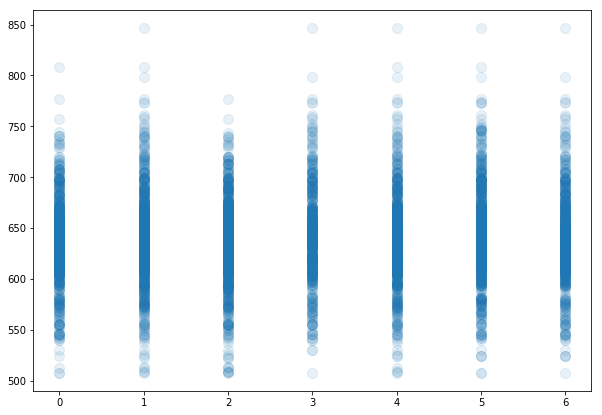

In [79]:
#7
%matplotlib inline

fig2 = plt.figure(figsize=(10,7))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

Y = dados['enen-nota']
X = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)
plt.show()

